In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.feature_selection import mutual_info_classif
pd.set_option('display.max_columns', None)
%matplotlib inline

In [3]:
churn_df = pd.read_csv("/content/train.csv")

In [4]:
print(churn_df.shape)
churn_df.head()

(13368, 25)


,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17.0,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2.0
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16.0,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1.0
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14.0,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5.0
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11.0,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5.0
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20.0,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5.0


In [5]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13368 entries, 0 to 13367
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   13368 non-null  object 
 1   Name                          13368 non-null  object 
 2   age                           13368 non-null  int64  
 3   gender                        13368 non-null  object 
 4   security_no                   13368 non-null  object 
 5   region_category               11357 non-null  object 
 6   membership_category           13367 non-null  object 
 7   joining_date                  13367 non-null  object 
 8   joined_through_referral       13367 non-null  object 
 9   referral_id                   13367 non-null  object 
 10  preferred_offer_types         13271 non-null  object 
 11  medium_of_operation           13367 non-null  object 
 12  internet_option               13367 non-null  object 
 13  l

In [6]:
churn_df.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 2011
membership_category                1
joining_date                       1
joined_through_referral            1
referral_id                        1
preferred_offer_types             97
medium_of_operation                1
internet_option                    1
last_visit_time                    1
days_since_last_login              1
avg_time_spent                     1
avg_transaction_value              1
avg_frequency_login_days           1
points_in_wallet                1226
used_special_discount              1
offer_application_preference       1
past_complaint                     1
complaint_status                   1
feedback                           1
churn_risk_score                   1
dtype: int64

In [7]:
binary_cols = []
for col in churn_df.columns:
    if churn_df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [8]:
binary_cols

['used_special_discount', 'offer_application_preference', 'past_complaint']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


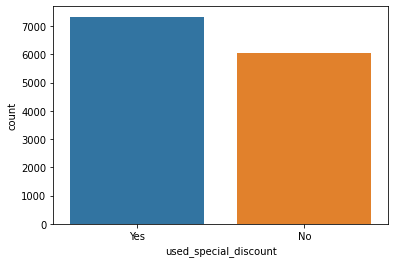

In [9]:
sns.countplot("used_special_discount", data=churn_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


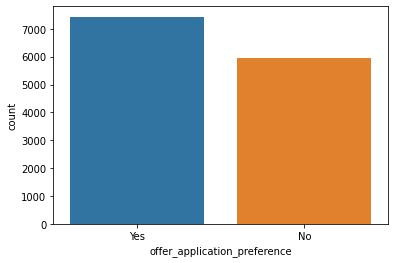

In [10]:
sns.countplot("offer_application_preference", data=churn_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


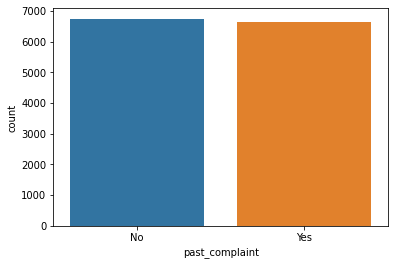

In [11]:
sns.countplot("past_complaint", data=churn_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


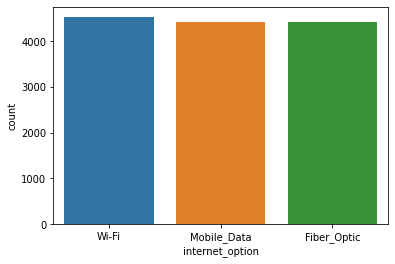

In [12]:
sns.countplot("internet_option", data=churn_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


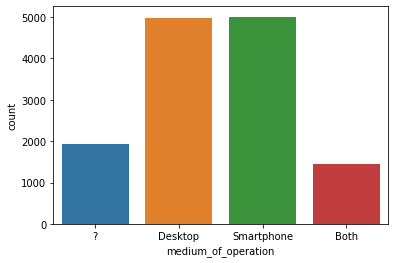

In [13]:
sns.countplot("medium_of_operation", data=churn_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

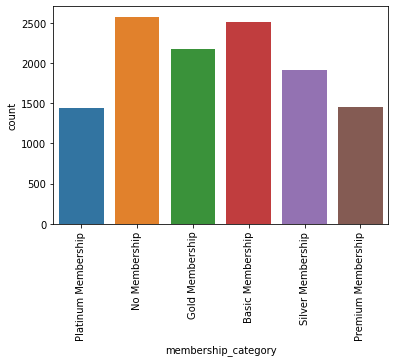

In [72]:
sns.countplot("membership_category", data=churn_df)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

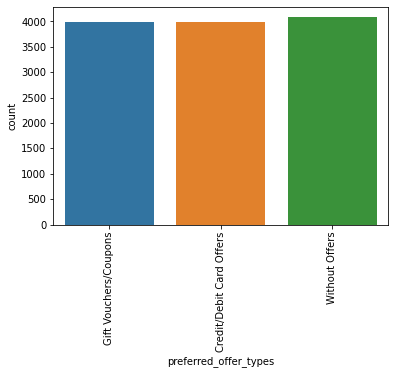

In [75]:
sns.countplot("preferred_offer_types", data=churn_df)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


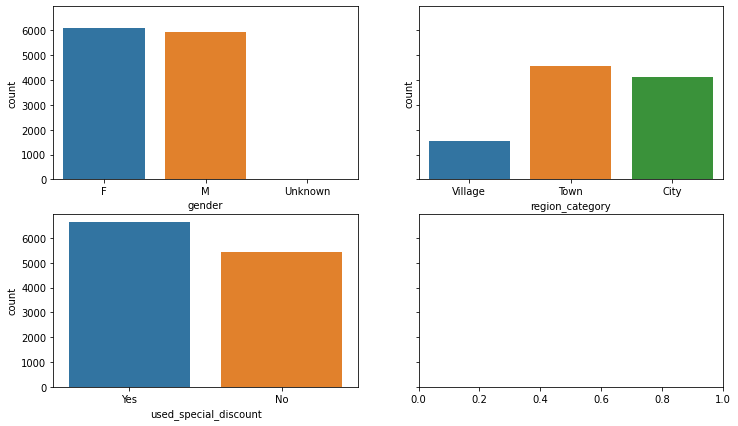

In [78]:
fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharey=True)
sns.countplot("gender", data=churn_df, ax=axes[0,0])
sns.countplot("region_category", data=churn_df, ax=axes[0,1])
sns.countplot("used_special_discount", data=churn_df, ax=axes[1,0])

(array([1, 2, 3, 4]), <a list of 4 Text major ticklabel objects>)

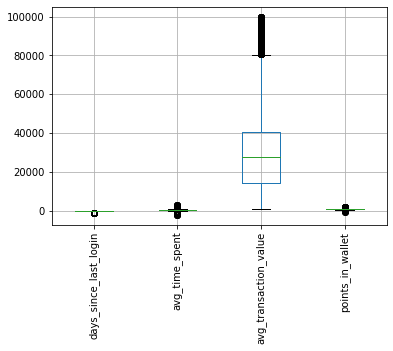

In [68]:
churn_df.boxplot(column=['days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet'])
plt.xticks(rotation=90)

In [66]:
churn_df[['days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
         'avg_frequency_login_days', 'points_in_wallet']].corr()

,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet
days_since_last_login,1.000000,-0.006080,0.002906,0.007991
avg_time_spent,-0.006080,1.000000,0.023341,-0.014205
avg_transaction_value,0.002906,0.023341,1.000000,0.087232
points_in_wallet,0.007991,-0.014205,0.087232,1.000000


In [67]:
churn_df[['region_category', 'preferred_offer_types', 'points_in_wallet']].head(10)

,region_category,preferred_offer_types,points_in_wallet
0,Village,Gift Vouchers/Coupons,781.75
2,Town,Gift Vouchers/Coupons,500.69
3,City,Gift Vouchers/Coupons,567.66
4,City,Credit/Debit Card Offers,663.06
5,City,Gift Vouchers/Coupons,722.27
6,Town,Gift Vouchers/Coupons,756.21
7,NaN,Credit/Debit Card Offers,568.08
9,Town,Gift Vouchers/Coupons,706.23
10,Village,Gift Vouchers/Coupons,699.70
11,City,Gift Vouchers/Coupons,798.12


In [17]:
churn_df.dropna(subset = ['preferred_offer_types', 'points_in_wallet'], inplace=True)

In [18]:
churn_df['churn_risk_score'].replace([-1], 1, inplace=True)

In [19]:
churn_df['churn_risk_score'].value_counts()

3.0    3384
5.0    3280
4.0    3219
1.0    1241
2.0     930
Name: churn_risk_score, dtype: int64

In [20]:
churn_df.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 1835
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types              0
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [21]:
churn_df['membership_category'].value_counts()

No Membership          2574
Basic Membership       2510
Gold Membership        2178
Silver Membership      1906
Premium Membership     1450
Platinum Membership    1436
Name: membership_category, dtype: int64

In [22]:
churn_df.groupby(['membership_category'])['churn_risk_score'].sum()

membership_category
Basic Membership       11382.0
Gold Membership         6422.0
No Membership          11766.0
Platinum Membership     3369.0
Premium Membership      3411.0
Silver Membership       6179.0
Name: churn_risk_score, dtype: float64

In [23]:
churn_df['churn_risk_score'].value_counts()

3.0    3384
5.0    3280
4.0    3219
1.0    1241
2.0     930
Name: churn_risk_score, dtype: int64

In [24]:
churn_df.groupby(['preferred_offer_types'])['churn_risk_score'].sum()

preferred_offer_types
Credit/Debit Card Offers    13924.0
Gift Vouchers/Coupons       13682.0
Without Offers              14923.0
Name: churn_risk_score, dtype: float64

In [25]:
churn_df['complaint_status'].value_counts()

Not Applicable              6081
Solved in Follow-up         1515
Unsolved                    1503
Solved                      1479
No Information Available    1476
Name: complaint_status, dtype: int64

In [26]:
churn_df['feedback'].value_counts()

No reason specified         2080
Poor Product Quality        2076
Poor Customer Service       2040
Too many ads                2021
Poor Website                1992
Reasonable Price             481
User Friendly Website        479
Products always in Stock     450
Quality Customer Care        435
Name: feedback, dtype: int64

In [27]:
churn_df['age'].max(), churn_df['age'].min()

(64, 10)

In [28]:
churn_df['age_category'] = pd.cut(churn_df["age"], bins = 5, labels = [1,2,3,4,5])

In [29]:
churn_df.groupby(['age_category'])['churn_risk_score'].sum()

age_category
1    8366.0
2    8329.0
3    8513.0
4    8490.0
5    8831.0
Name: churn_risk_score, dtype: float64

In [30]:
churn_df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score', 'age_category'],
      dtype='object')

In [31]:
vars = ['membership_category', 'preferred_offer_types', 'region_category',
       'medium_of_operation', 'internet_option',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'age_category', 'churn_risk_score']

new_churn = churn_df[vars]

In [32]:
new_churn.shape

(12054, 17)

## Guided Ordinal Encoding

In [33]:
new_churn.head()

,membership_category,preferred_offer_types,region_category,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,age_category,churn_risk_score
0,Platinum Membership,Gift Vouchers/Coupons,Village,?,Wi-Fi,17.0,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,1,2.0
2,No Membership,Gift Vouchers/Coupons,Town,Desktop,Wi-Fi,14.0,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,4,5.0
3,No Membership,Gift Vouchers/Coupons,City,Desktop,Mobile_Data,11.0,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,3,5.0
4,No Membership,Credit/Debit Card Offers,City,Smartphone,Mobile_Data,20.0,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,2,5.0
5,Gold Membership,Gift Vouchers/Coupons,City,?,Wi-Fi,23.0,433.62,13884.77,24.0,722.27,Yes,No,Yes,Unsolved,No reason specified,1,3.0


In [34]:
def target_ordinal(feature: str):
  labels = new_churn.groupby([feature])['churn_risk_score'].mean().sort_values().index
  labels_dict = {k:i for i,k in enumerate(labels,0)}
  new_churn[f'{feature}-encoded'] = new_churn[feature].map(labels_dict)
  return {f'{feature}-encoded':labels_dict}

In [35]:
print(target_ordinal('membership_category'))
print(target_ordinal('preferred_offer_types'))
print(target_ordinal('used_special_discount'))
print(target_ordinal('past_complaint'))
print(target_ordinal('feedback'))
print(target_ordinal('complaint_status'))
print(target_ordinal('age_category'))
print(target_ordinal('medium_of_operation'))
print(target_ordinal('internet_option'))

{'membership_category-encoded': {'Platinum Membership': 0, 'Premium Membership': 1, 'Gold Membership': 2, 'Silver Membership': 3, 'Basic Membership': 4, 'No Membership': 5}}
{'preferred_offer_types-encoded': {'Gift Vouchers/Coupons': 0, 'Credit/Debit Card Offers': 1, 'Without Offers': 2}}
{'used_special_discount-encoded': {'Yes': 0, 'No': 1}}
{'past_complaint-encoded': {'No': 0, 'Yes': 1}}
{'feedback-encoded': {'Products always in Stock': 0, 'Reasonable Price': 1, 'Quality Customer Care': 2, 'User Friendly Website': 3, 'Poor Customer Service': 4, 'Poor Website': 5, 'No reason specified': 6, 'Too many ads': 7, 'Poor Product Quality': 8}}
{'complaint_status-encoded': {'Not Applicable': 0, 'No Information Available': 1, 'Solved': 2, 'Solved in Follow-up': 3, 'Unsolved': 4}}
{'age_category-encoded': {1: 0, 3: 1, 2: 2, 4: 3, 5: 4}}
{'medium_of_operation-encoded': {'Both': 0, 'Desktop': 1, '?': 2, 'Smartphone': 3}}
{'internet_option-encoded': {'Fiber_Optic': 0, 'Wi-Fi': 1, 'Mobile_Data': 2}}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [36]:
new_churn.drop(columns = ['membership_category', 'complaint_status', 'preferred_offer_types', 'used_special_discount', 
                          'past_complaint', 'feedback', 'age_category', 'medium_of_operation', 'internet_option', 'region_category', 
                          'offer_application_preference'],
               inplace = True)

In [37]:
new_churn.head(20)

,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,membership_category-encoded,preferred_offer_types-encoded,used_special_discount-encoded,past_complaint-encoded,feedback-encoded,complaint_status-encoded,age_category-encoded,medium_of_operation-encoded,internet_option-encoded
0,17.0,300.63,53005.25,17.0,781.750000,2.0,0,0,0,0,0,0,0,2,1
2,14.0,516.16,21027.00,22.0,500.690000,5.0,5,0,1,1,5,3,3,1,1
3,11.0,53.27,25239.56,6.0,567.660000,5.0,5,0,1,1,5,4,1,1,2
4,20.0,113.13,24483.66,16.0,663.060000,5.0,5,1,1,1,5,2,2,3,2
5,23.0,433.62,13884.77,24.0,722.270000,3.0,2,0,0,1,6,4,0,2,1
6,10.0,55.38,8982.50,28.0,756.210000,3.0,2,0,0,1,6,3,2,1,2
7,19.0,429.11,44554.82,24.0,568.080000,5.0,5,1,1,1,8,4,1,0,0
9,10.0,97.31,19244.16,28.0,706.230000,4.0,5,0,1,1,4,1,3,2,1
10,14.0,570.23,35119.93,8.0,699.700000,5.0,4,0,0,0,8,0,2,0,1
11,14.0,55.53,41672.02,33.02434314076341,798.120000,3.0,2,0,0,0,7,0,4,3,1


In [38]:
val = new_churn[~(new_churn['avg_frequency_login_days'] == 'Error')]['avg_frequency_login_days'].astype('float64').mean()
new_churn['avg_frequency_login_days'].replace('Error', str(val), inplace=True)

In [39]:
new_churn['avg_frequency_login_days'] = pd.to_numeric(new_churn['avg_frequency_login_days'])
new_churn['age_category-encoded'] = pd.to_numeric(new_churn['age_category-encoded'])

In [40]:
new_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12054 entries, 0 to 13366
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   days_since_last_login          12054 non-null  float64
 1   avg_time_spent                 12054 non-null  float64
 2   avg_transaction_value          12054 non-null  float64
 3   avg_frequency_login_days       12054 non-null  float64
 4   points_in_wallet               12054 non-null  float64
 5   churn_risk_score               12054 non-null  float64
 6   membership_category-encoded    12054 non-null  int64  
 7   preferred_offer_types-encoded  12054 non-null  int64  
 8   used_special_discount-encoded  12054 non-null  int64  
 9   past_complaint-encoded         12054 non-null  int64  
 10  feedback-encoded               12054 non-null  int64  
 11  complaint_status-encoded       12054 non-null  int64  
 12  age_category-encoded           12054 non-null 

## Scaling

In [41]:
scaled_cols = ['days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
               'avg_frequency_login_days', 'points_in_wallet']

In [42]:
scaler = MinMaxScaler()
new_churn[scaled_cols] = scaler.fit_transform(new_churn[scaled_cols])

In [43]:
new_churn

,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,membership_category-encoded,preferred_offer_types-encoded,used_special_discount-encoded,past_complaint-encoded,feedback-encoded,complaint_status-encoded,age_category-encoded,medium_of_operation-encoded,internet_option-encoded
0,0.991220,0.492530,0.527238,0.565916,0.576646,2.0,0,0,0,0,0,0,0,2,1
2,0.988293,0.536812,0.204241,0.612568,0.454889,5.0,5,0,1,1,5,3,3,1,1
3,0.985366,0.441707,0.246790,0.463281,0.483901,5.0,5,0,1,1,5,4,1,1,2
4,0.994146,0.454006,0.239155,0.556585,0.525229,5.0,5,1,1,1,5,2,2,3,2
5,0.997073,0.519854,0.132100,0.631229,0.550879,3.0,2,0,0,1,6,4,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13362,0.983415,0.484416,0.089782,0.528594,0.586731,1.0,1,0,0,1,1,1,4,1,2
13363,0.979512,0.602629,0.385270,0.556346,0.512120,4.0,4,2,0,1,4,1,4,3,1
13364,0.986341,0.543773,0.438824,0.649889,0.513602,4.0,3,2,0,0,8,0,4,2,2
13365,0.978537,0.456346,0.093620,0.500603,0.503850,5.0,4,0,1,0,6,0,1,3,2


(array([1, 2, 3, 4, 5]), <a list of 5 Text major ticklabel objects>)

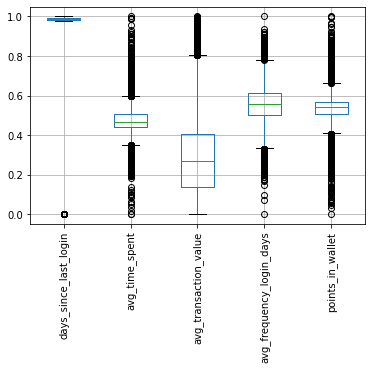

In [69]:
new_churn.boxplot(column=['days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
               'avg_frequency_login_days', 'points_in_wallet'])
plt.xticks(rotation=90)

In [45]:
X = new_churn.drop(columns=['churn_risk_score'])
y = new_churn['churn_risk_score']

In [46]:
X.columns

Index(['days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet',
       'membership_category-encoded', 'preferred_offer_types-encoded',
       'used_special_discount-encoded', 'past_complaint-encoded',
       'feedback-encoded', 'complaint_status-encoded', 'age_category-encoded',
       'medium_of_operation-encoded', 'internet_option-encoded'],
      dtype='object')

# Mutual Info gain and Chi square Test

In [47]:
X_cat = ['membership_category-encoded', 'preferred_offer_types-encoded',
         'used_special_discount-encoded', 'past_complaint-encoded',
         'feedback-encoded', 'complaint_status-encoded', 'age_category-encoded',
         'medium_of_operation-encoded', 'internet_option-encoded']

X_num = ['days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
         'avg_frequency_login_days', 'points_in_wallet']

In [48]:
mutual_info = mutual_info_classif(X[X_cat],y)
mutual_info

array([0.54298902, 0.00336076, 0.        , 0.00467747, 0.36350936,
       0.01016553, 0.        , 0.        , 0.00167308])

In [49]:
mi = pd.Series(mutual_info)
mi.index = X_cat
mi.sort_values(ascending=False)

membership_category-encoded      0.542989
feedback-encoded                 0.363509
complaint_status-encoded         0.010166
past_complaint-encoded           0.004677
preferred_offer_types-encoded    0.003361
internet_option-encoded          0.001673
used_special_discount-encoded    0.000000
age_category-encoded             0.000000
medium_of_operation-encoded      0.000000
dtype: float64

In [50]:
chi_test = chi2(X[X_cat],y)
chi_test

(array([7.29126249e+03, 5.96224541e+01, 4.61924866e+00, 9.88670948e+00,
        5.02913674e+03, 3.12772748e+01, 5.12440531e+00, 1.69308379e+01,
        1.72417617e+00]),
 array([0.00000000e+00, 3.48223117e-12, 3.28640891e-01, 4.23799038e-02,
        0.00000000e+00, 2.68747123e-06, 2.74769263e-01, 1.99367844e-03,
        7.86321451e-01]))

In [51]:
chi = pd.Series(chi_test[1])
chi.index = X_cat
chi.sort_values(ascending=True)

membership_category-encoded      0.000000e+00
feedback-encoded                 0.000000e+00
preferred_offer_types-encoded    3.482231e-12
complaint_status-encoded         2.687471e-06
medium_of_operation-encoded      1.993678e-03
past_complaint-encoded           4.237990e-02
age_category-encoded             2.747693e-01
used_special_discount-encoded    3.286409e-01
internet_option-encoded          7.863215e-01
dtype: float64

# Train-Test Split
With selected features based on above test

In [52]:
X = new_churn[['days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet','membership_category-encoded', 'preferred_offer_types-encoded',
         'feedback-encoded', 'complaint_status-encoded', 'age_category-encoded',]]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [53]:
X_train.shape

(8437, 10)

In [54]:
cross_val_score(RandomForestClassifier(n_estimators = 100, criterion = 'entropy', min_samples_leaf = 2, random_state = 42),
                X, y, cv = 5).mean()

0.7675450864037752

In [55]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', min_samples_leaf = 2, random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2, random_state=42)

In [56]:
# param_grid = { 
#     'n_estimators': [100, 200, 300],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [5,10,15,20],
#     'criterion' :['gini', 'entropy']
# }

In [57]:
# rfc = RandomForestClassifier()
# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_train, y_train)

In [58]:
# CV_rfc.best_params_

In [59]:
# classifier = RandomForestClassifier(n_estimators = 300, max_features = 'auto', max_depth = 10, criterion = 'gini')
# classifier.fit(X_train, y_train)

In [60]:
y_pred = classifier.predict(X_test)

In [61]:
matrix = confusion_matrix(y_test,y_pred, labels=[1,2,3,4,5])

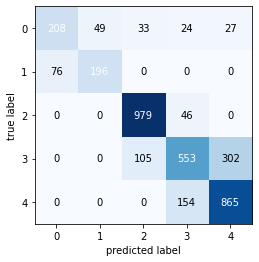

In [62]:
fig, ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

In [63]:
# F1 Score

label = [1,2,3,4,5]

scores = list(f1_score(y_test, y_pred, average = None, labels = label))

sum(scores)/len(scores)*100

75.12787417313905